In [2]:
from sklearn import datasets
from sklearn import decomposition, svm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow 
from PIL import Image #Este módulo de Python Imaging Library (PIL) permite
# trabajar con imágenes
import cv2 #Esta es la librería OpenCV que es usada para procesamiento de
#imágenes

(13233, 62, 47)
Las imágenes del dataset tienen dimensiones 62 x 47 y tiene un total de 13233 imágenes


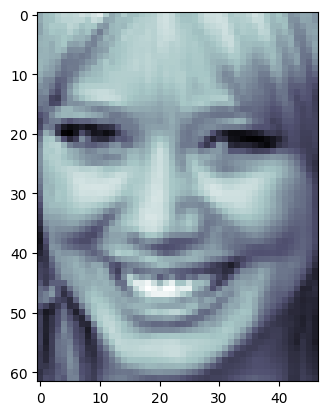

In [3]:
#Usamos la función 'fetch_lfw_people()' para cargar el dataset LFW (Labeled 
#Faces in the Wild) el cual contiene imágenes de personas famosas
faces = datasets.fetch_lfw_people()
#Para acceder a las dimensiones de las imágenes usamos lo siguiente
face_dim = faces.images.shape
print(face_dim)
print('Las imágenes del dataset tienen dimensiones {} x {}'.format(face_dim[1],
                                                                   face_dim[2]),
       'y tiene un total de {} imágenes'.format(face_dim[0]))
#Ahora mostramos un ejemplo de una de las imágenes del dataset
data_faces = faces.data[1672].reshape(62,47)
imshow(np.asarray(data_faces),cmap=plt.cm.bone);

In [4]:
#Dividimos el dataset en datos de entrenamiento y de prueba e imprimimos las
#dimensiones de estos subconjuntos de datos
X_train, X_test, y_train, y_test =train_test_split(faces.data, 
    faces.target, random_state =1)
print(X_train.shape, X_test.shape)

(9924, 2914) (3309, 2914)


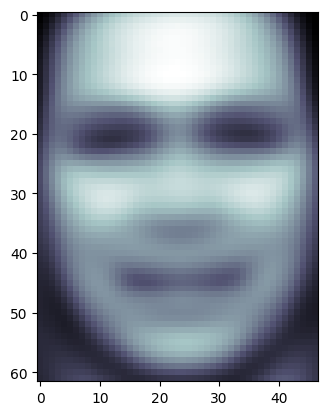

In [5]:
#Ahora se ejecutará el análisis de componentes principales (PCA) sobre el set de
#entrenamiento
pca = decomposition.PCA(n_components=300, whiten=True)
pca.fit(X_train)
#Ahora se muestra la cara promedio
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)

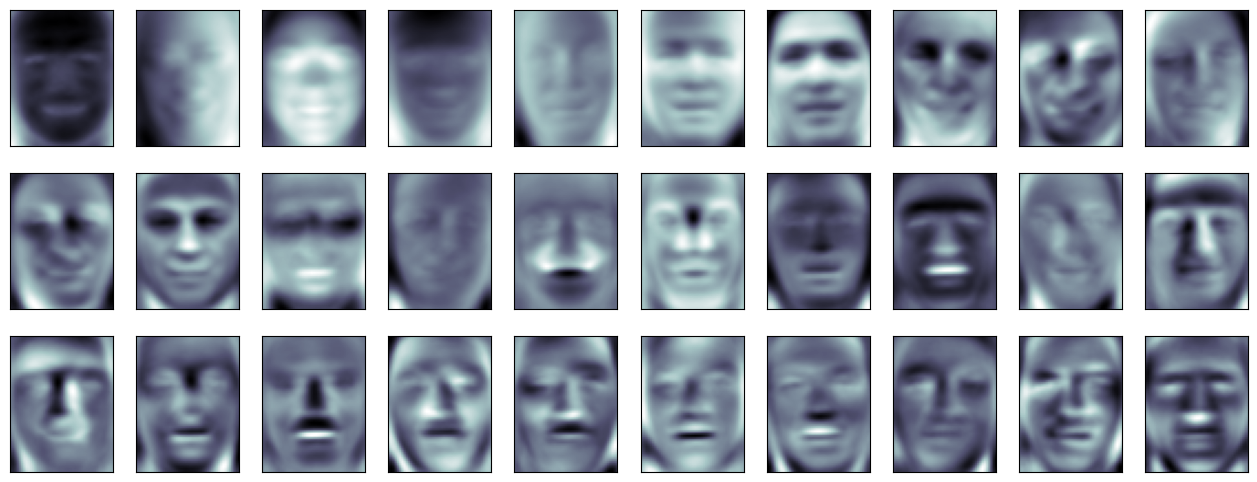

In [6]:
#Ahora generamos una figura a partir de subplots que mostrarán las primeras 30 
#componentes principales obtenidas del análisis PCA
fig = plt.figure(figsize=(16,6))
for i in range (30):
  ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
  #Cada componente principal es reformada para que iguale la forma de las 
  #imágenes originales
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)

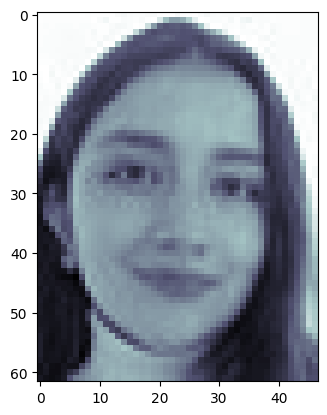

In [8]:
#Abrimos la imagen de mi cara y le cambiamos el tamaño para que sea igual al de
#las imágenes del dataset
image = Image.open('Laura.jpg').resize((47,62))
#Convertimos la imagen a escala de grises usando OpenCV, luego aplanamos la 
#imagen para finalmente mostrarla
image_numpy = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2GRAY).flatten()
imshow(np.asarray(image_numpy.reshape(62,47)),cmap = plt.cm.bone);

(2914,)
(2914,)
La base es:  [-7403.6753, -71.199875, -1499.7299, -194.66908, 828.34644, 412.1558, -1130.893, -184.3288, -462.20505, -949.60126, -489.41776, 417.29443, 226.9986, 318.2784, 145.43498, -278.67792, -5.9732037, 498.07776, 414.61047, 402.62534, 47.00008, -422.80292, -151.23729, 37.754738, 833.1881, 122.969284, -168.0848, 636.893, -64.564026, -356.13828, -409.63138, 29.61745, -56.63059, -343.49963, -72.44796, -279.80493, -97.69334, 112.697876, -89.31644, 374.42365, -287.35352, 405.38202, -78.1384, -46.94891, -153.51573, 109.55635, -57.62139, 241.67581, 330.3615, 47.825237, -146.99641, 5.5514216, 320.75055, -187.16255, 113.87795, 112.93655, -255.55968, -11.374683, -279.46118, -140.12614, 105.700584, -323.5755, 129.59625, -249.48294, -89.40406, -34.042427, 124.68239, -78.01321, 75.08769, 247.91057, 51.73364, -57.35036, 98.924286, 188.69919, -39.92355, -439.87625, 107.88247, 242.7397, -96.63504, 40.532017, 14.854444, -74.40969, 8.60908, 25.527563, 143.21156, 142.21559, -117.3444

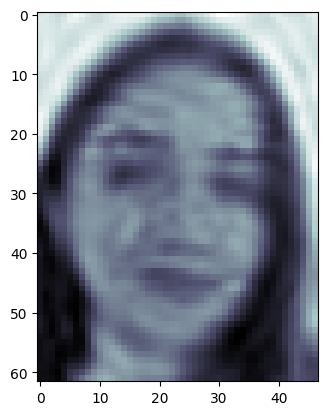

In [11]:
mean_face = pca.mean_
print(pca.mean_.shape)
#Calculamos la diferencia entre la imagen de mi cara y la cara promedio
diff_face = image_numpy - mean_face
print(diff_face.shape)
projection = []
#Proyectamos la diferencia sobre las componentes principales y reconstruimos la 
#imagen basados en esta proyección
for i in range (300):
  projection.append(np.dot(diff_face, pca.components_[i]))
print('La base es: ', projection)
#Imprimimos la máxima contribución de una componente principal en la 
#reconstrucción de la imagen
print('La máxima contribución es de: ', max([abs(i) for i in projection]))

rec = mean_face
for i in range (300):
  rec = rec + projection[i]*pca.components_[i]

#Finalmente mostramos la imagen reconstruida
imshow(rec.reshape(62,47), cmap=plt.cm.bone);